In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage , set_link_color_palette
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('dados_paises.csv',header=0,index_col='country')

In [5]:
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900


In [6]:
#Assurence that there is no missing values on the dateset
for col in df.columns.values: 
    if df[col].isnull().values.any():
        print(col)

In [7]:
# Statistical summary of our dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
# Z-Score of our dataframe (not needed for this dataset)
df_zscore = zscore(df)

In [9]:
#Assurence that the variables have mean equal to 0 and standard deviation equal to 1
for col in df.columns.values:
    assert round(df_zscore[col].mean()) == 0, 'Mean not equal to 0'
    assert round(df_zscore[col].std()) == 1, 'Standard deviation not equal to 1'

In [10]:
#funtion to visualize the matrix of euclidean distances
def euclidean_def(x, y):
    x2 = np.einsum('ij,ij->i', x, x)[:, np.newaxis]
    y2 = np.einsum('ij,ij->i', y, y)[np.newaxis, :]
    xy = x @ y.T
    return np.sqrt(np.abs(x2 + y2 - 2. * xy))

In [11]:
# If you want to see the matrix of euclidean distances
#euclidean_def(df_zscore, df_zscore)

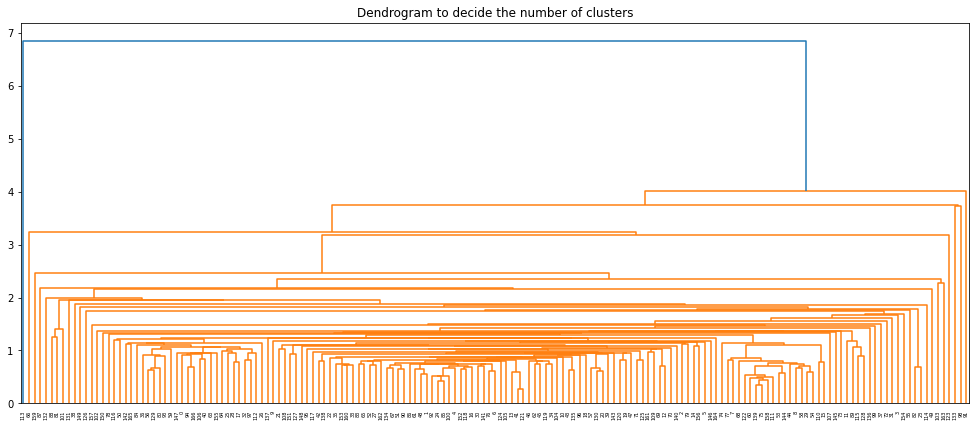

In [12]:
# Dendrogram using simple linkage and euclidean distances
plt.figure(figsize=(17, 7))  
plt.title("Dendrogram to decide the number of clusters")  
dend = dendrogram(linkage(df_zscore, method='single',metric='euclidean',optimal_ordering=True))

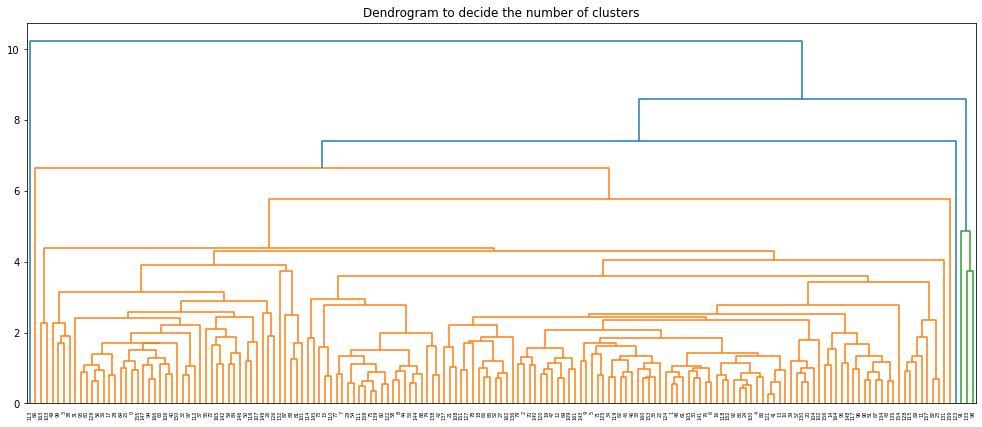

In [13]:
# Dendrogram using average linkage and euclidean distances
plt.figure(figsize=(17, 7))  
plt.title("Dendrogram to decide the number of clusters")  
dend = dendrogram(linkage(df_zscore, method='average',metric='euclidean',optimal_ordering=True))

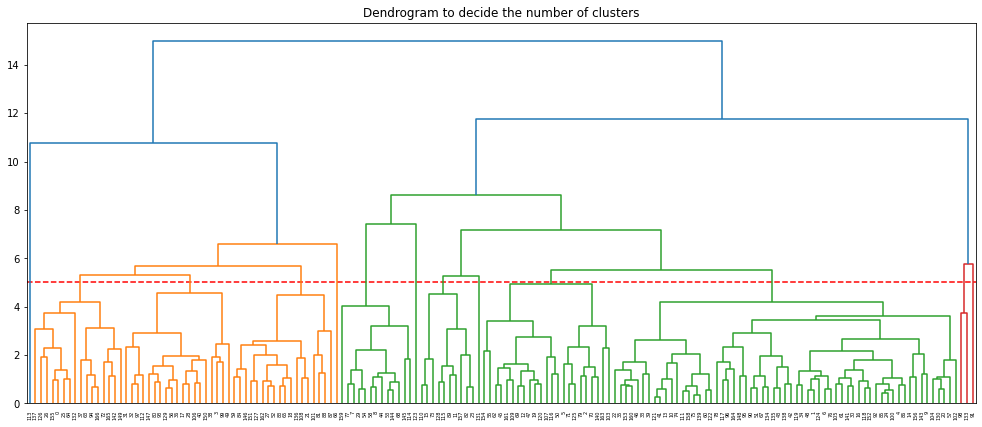

In [15]:
# Dendrogram using complete linkage (use the furthermost observation of the cluster) and euclidean distances
plt.figure(figsize=(17, 7))  
plt.title("Dendrogram to decide the number of clusters")
plt.axhline(y=5.0, c='r',ls='--')
dend = dendrogram(linkage(df_zscore, method='complete',metric='euclidean',optimal_ordering=True))

We choose 12 clusters to this dataset

In [20]:
cluster_H = AgglomerativeClustering(affinity='euclidean',linkage='complete',compute_distances=True,n_clusters=12)
df_zscore['cluster_H'] = cluster_H.fit_predict(df_zscore)

In [21]:
# ANOVA of the each variable (except cluster_H column)
for col in df.columns.values: 
    model = ols(f'{col} ~ C(cluster_H)', data=df_zscore).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)
    print(col,'\n',anova_table,'\n-------------------------------------')

child_mort 
                  df      sum_sq    mean_sq          F        PR(>F)
C(cluster_H)   11.0  115.785047  10.525913  31.856254  2.311666e-34
Residual      155.0   51.214953   0.330419        NaN           NaN 
-------------------------------------
exports 
                  df     sum_sq   mean_sq         F        PR(>F)
C(cluster_H)   11.0  98.476463  8.952406  20.25031  7.132443e-25
Residual      155.0  68.523537  0.442087       NaN           NaN 
-------------------------------------
health 
                  df     sum_sq   mean_sq          F        PR(>F)
C(cluster_H)   11.0  80.824086  7.347644  13.215814  1.554066e-17
Residual      155.0  86.175914  0.555974        NaN           NaN 
-------------------------------------
imports 
                  df     sum_sq   mean_sq          F        PR(>F)
C(cluster_H)   11.0  94.865685  8.624153  18.531315  3.238112e-23
Residual      155.0  72.134315  0.465383        NaN           NaN 
-------------------------------------
income 

The ANOVA evaluation of the clustering indicates that all variables are contributing to this clustering at 5% of significance

In [22]:
#Assing clustering to original Datafreme
df['cluster_H'] = cluster_H.labels_ 

#Columns of intrest
col_list = ['income','gdpp','child_mort','health','life_expec']
analysis_df = pd.DataFrame()
for col in col_list:
    # Analysis done using the mean of each column
    analysis_df[f'{col}'] = df[col].groupby(by=df.cluster_H).mean()

In [23]:
analysis_df

,income,gdpp,child_mort,health,life_expec
cluster_H,,,,,
0,22041.176471,12272.941176,16.288235,6.202353,73.958824
1,68766.666667,33900.000000,11.050000,3.218333,77.000000
2,13883.214286,7538.214286,22.082143,6.837143,72.489286
3,44433.333333,52326.666667,4.200000,10.811333,80.846667
4,50200.000000,33850.000000,4.800000,6.305000,81.500000
5,5150.000000,2330.000000,130.000000,5.070000,60.500000
6,91700.000000,105000.000000,2.800000,7.770000,81.300000
7,1526.266667,637.933333,113.893333,7.028000,57.066667
8,4561.538462,2109.769231,39.592308,9.345385,66.876923
